In [2]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import pandas as pd

%matplotlib inline

In [3]:
dir='/work/teletravaille/SSH_10 members/'
file_1='local_mean.cdf'
file_2='local_truth_10.cdf'

In [4]:
global_mean=xr.open_dataset(dir+file_1)
diff=xr.open_dataset(dir+file_2)

In [5]:
lat=global_mean.latxy
lon=global_mean.lonxy

In [6]:
SSH_global_mean=global_mean.SSH
SST_global_mean=global_mean.SST
SSS_global_mean=global_mean.SSS

In [7]:
SSH_global_truth=diff.SSH
SST_global_truth=diff.SST
SSS_global_truth=diff.SSS

In [8]:
SSH_global_mean=SSH_global_mean.squeeze()
SST_global_mean=SST_global_mean.squeeze()
SSS_global_mean=SSS_global_mean.squeeze()


In [9]:
SSH_global_truth=SSH_global_truth.squeeze()
SST_global_truth=SST_global_truth.squeeze()
SSS_global_truth=SSS_global_truth.squeeze()

## Global Mean 

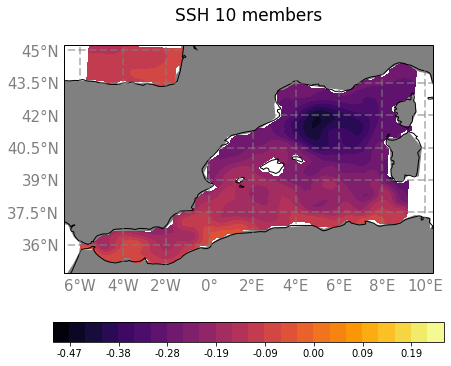

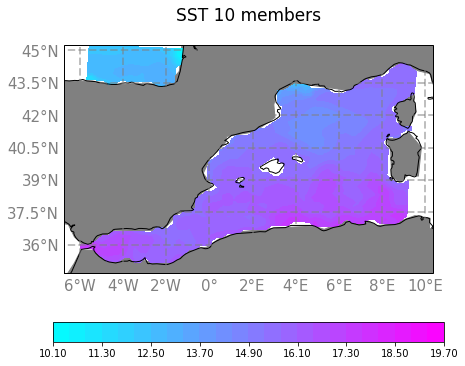

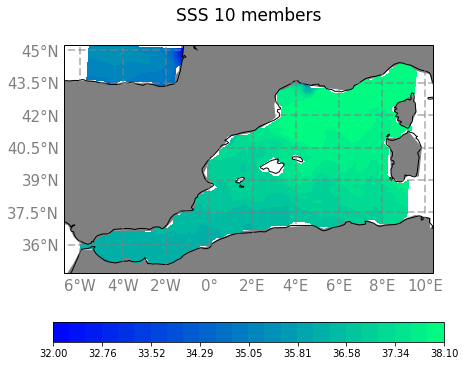

In [11]:
levels_SSH = np.linspace(-0.5, 0.25, 25)
levels_SST = np.linspace(10.1, 19.7, 25)
levels_SSS = np.linspace(32, 38.1, 25)



cmap = [plt.get_cmap('inferno'),plt.get_cmap('cool'), plt.get_cmap('winter')]
var = [SSH_global_mean, SST_global_mean, SSS_global_mean]
levels = [levels_SSH, levels_SST, levels_SSS]
title = ['SSH 10 members', 'SST 10 members', 'SSS 10 members']

for ii in [0,1,2]:
    fig = plt.figure(figsize=(7,6))
    ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap[ii])
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1, format='%0.02f') 
    ax1.set_title(title[ii] ,size=17,y=1.08)

    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines(resolution='50m')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
#    plt.savefig('/C/work/teletravaille/UV_0.01/'+title[ii])
    plt.savefig(title[ii])



## Difference

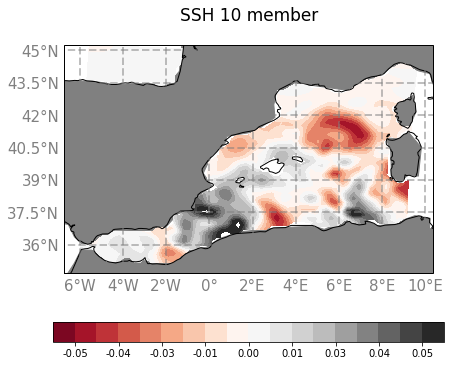

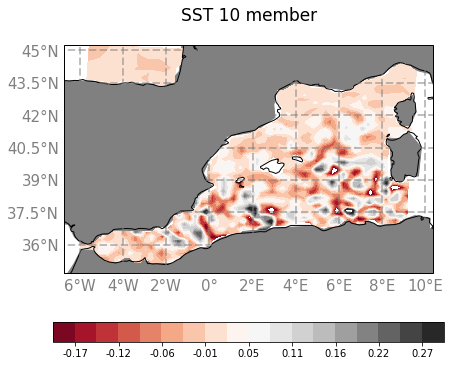

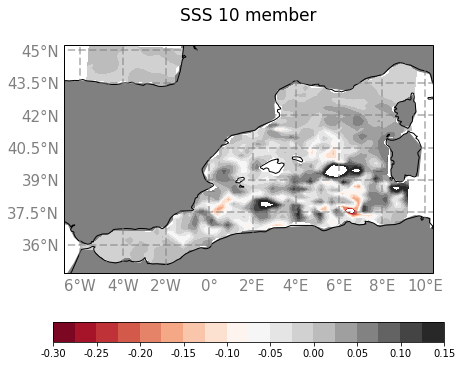

In [10]:
levels_SSH = np.linspace(-0.06, 0.06, 19)
levels_SST = np.linspace(-0.2, 0.3, 19)
levels_SSS = np.linspace(-0.3, 0.15, 19)


#cmap = [plt.get_cmap('seismic'),plt.get_cmap('seismic'), plt.get_cmap('seismic'), plt.get_cmap('seismic'), plt.get_cmap('seismic')]
#cmap = plt.get_cmap('PiYG')
cmap = plt.get_cmap('bwr')
cmap = plt.get_cmap('seismic')
cmap = plt.get_cmap('RdGy')


var = [SSH_global_truth, SST_global_truth, SSS_global_truth]
levels = [levels_SSH, levels_SST, levels_SSS]
title = ['SSH 10 member', 'SST 10 member', 'SSS 10 member']

for ii in [0,1,2]:
    fig = plt.figure(figsize=(7,6))
    ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1, format='%0.02f') 
    ax1.set_title(title[ii] ,size=17,y=1.08)

    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines(resolution='50m')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
#    plt.savefig('/C/work/teletravaille/UV_0.01/'+title[ii])
    plt.savefig(title[ii])


#plt.suptitle('Local Mean' ,size=19)
#plt.show(SSH_global_mean)